# Spam Email Detection using AdaBoost Classifier

This project leverages the power of AdaBoost, a meta-algorithm that combines multiple weak classifiers to create a strong classifier. By iteratively weighting misclassified samples and training new classifiers, AdaBoost effectively identifies patterns in email data. This model aims to accurately detect spam emails, enhancing email security and filtering.

# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load and Explore Dataset

In [7]:
df = pd.read_csv(r'C:\Users\user\Desktop\CognoRise Infotech ML Intern\data\spam_email_data.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
print("\n--- Data Overview ---")
print(df.head())

print("\n--- Data Description ---")
print(df.describe())

print("\n--- Check for Null Values ---")
print(df.isnull().sum())


--- Data Overview ---
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

--- Data Description ---
       Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30

--- Check for Null Values ---
Category    0
Message     0
dtype: int64


In [9]:
# check distribution of spam and ham categories
print("\n--- Category Distribution ---")
category_counts = df['Category'].value_counts(normalize=True) * 100
print(category_counts)


--- Category Distribution ---
Category
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


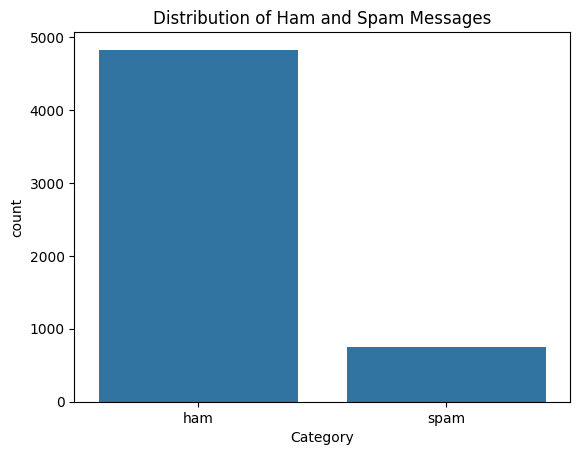

In [10]:
# plot the distribution of spam and ham messages
sns.countplot(data=df, x='Category')
plt.title('Distribution of Ham and Spam Messages')
plt.show()

# Data Processing

In [12]:
# map labels to binary values
df['Category'] = df['Category'].map({'ham':0, 'spam':1})

In [13]:
# text vectorixation using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(df['Message'])
y = df['Category']

In [14]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and test sets.")


Data split into training and test sets.


# Model Training using AdaBoost Classifier

In [15]:
# initialize and train AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
print("\nModel training complete.")

C:\Users\user\Desktop\CognoRise Infotech ML Intern\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model training complete.


# Model Evaluation

In [18]:
y_pred = adaboost.predict(X_test)

In [19]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy: .2f}")


Accuracy:  0.97


In [20]:
# classification report
print("\n--- Classfication Report ---")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


--- Classfication Report ---
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       966
        Spam       0.96      0.84      0.90       149

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115




--- Confusion Matrix ---


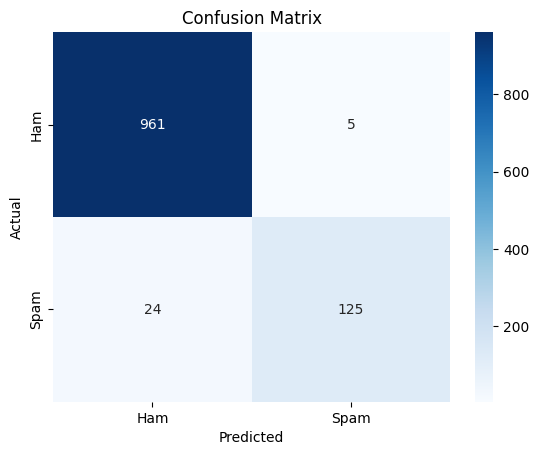

In [23]:
# confusion matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Conclusion

In [25]:
print("The AdaBoost classifier for spam detection has been successfully trained and evaluated.")
print(f"Final accuracy: {accuracy:.2f}")

The AdaBoost classifier for spam detection has been successfully trained and evaluated.
Final accuracy: 0.97
